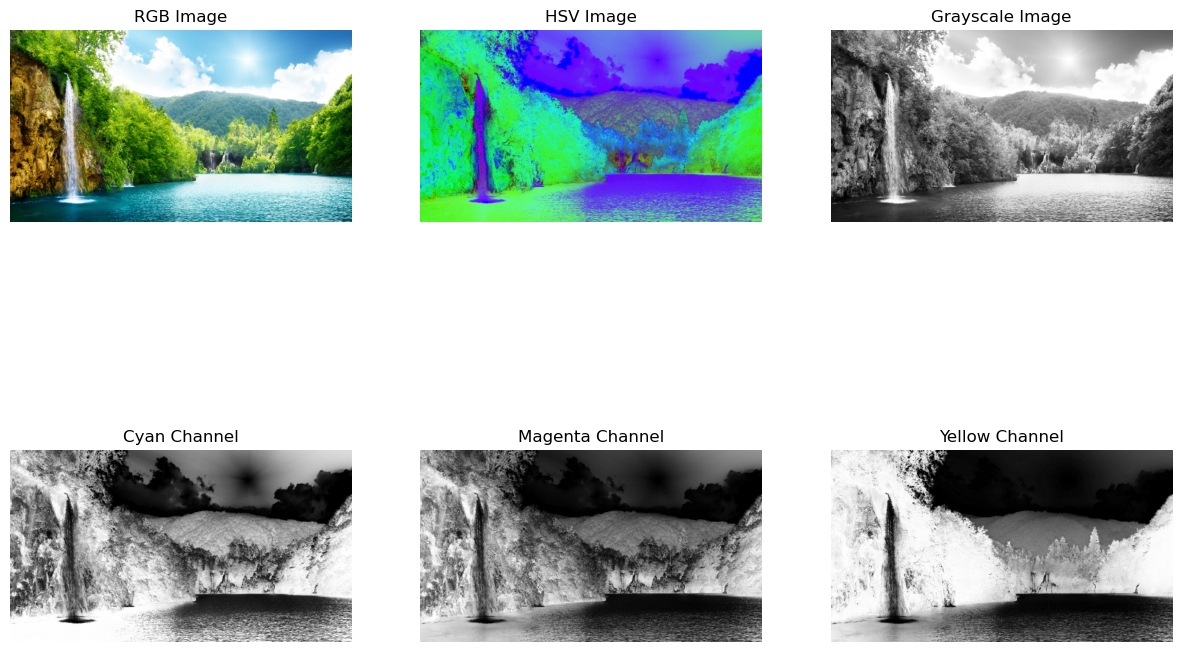

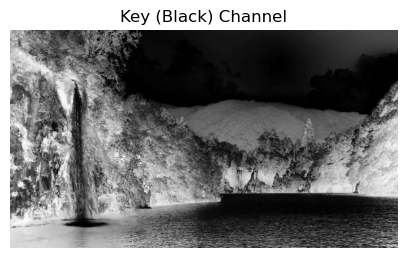

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (you can replace 'your_image.jpg' with your actual image file)
image_rgb = cv2.imread(r"C:\Users\Student\Desktop\R.jpg")

# Check if the image is loaded successfully
if image_rgb is None:
    print("Error: Image not loaded correctly. Please check the file path.")
else:
    # Convert RGB to HSV
    image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2HSV)

    # Normalize the RGB image to [0, 1] range
    image_normalized = image_rgb / 255.0

    # Calculate CMYK channels
    C = 1 - image_normalized[:, :, 2]  # Cyan
    M = 1 - image_normalized[:, :, 1]  # Magenta
    Y = 1 - image_normalized[:, :, 0]  # Yellow
    K = np.min(np.array([C, M, Y]), axis=0)  # Key (Black)

    # Create CMYK image by stacking the channels
    image_cmyk = np.dstack((C, M, Y, K))

    # Scale the CMYK channels to the 0-255 range
    image_cmyk = (image_cmyk * 255).astype(np.uint8)

    # Convert RGB to grayscale
    image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)

    # Display all the images
    plt.figure(figsize=(15, 10))

    # RGB Image
    plt.subplot(2, 3, 1)
    plt.imshow(cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB))
    plt.title("RGB Image")
    plt.axis('off')

    # HSV Image
    plt.subplot(2, 3, 2)
    plt.imshow(image_hsv)
    plt.title("HSV Image")
    plt.axis('off')

    # Grayscale Image
    plt.subplot(2, 3, 3)
    plt.imshow(image_gray, cmap='gray')
    plt.title("Grayscale Image")
    plt.axis('off')

    # Cyan Channel
    plt.subplot(2, 3, 4)
    plt.imshow(C, cmap='gray')
    plt.title("Cyan Channel")
    plt.axis('off')

    # Magenta Channel
    plt.subplot(2, 3, 5)
    plt.imshow(M, cmap='gray')
    plt.title("Magenta Channel")
    plt.axis('off')

    # Yellow Channel
    plt.subplot(2, 3, 6)
    plt.imshow(Y, cmap='gray')
    plt.title("Yellow Channel")
    plt.axis('off')

    plt.show()

    # CMYK Key (Black) Channel
    plt.figure(figsize=(5, 5))
    plt.imshow(K, cmap='gray')
    plt.title("Key (Black) Channel")
    plt.axis('off')
    plt.show()